In [43]:
import matplotlib.pyplot as plt
import pandas as pd
import NetworkToolkit as nt
import numpy as np

In [67]:
data = nt.Database.read_data_into_pandas("Topology_Data", "robustness-sim-test", find_dic={"lambda_r":{"$exists":True}, "BA_m":4})

In [68]:
len(data.loc[data["edge_removal_idx"]==6])


200

In [57]:
data["edge_removal_idx"].max()+1

7

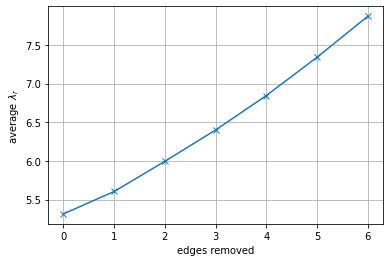

In [59]:
mean_lambda_edge_removal = [data.loc[data["edge_removal_idx"]==i]["lambda_r"].mean() for i in range(data["edge_removal_idx"].max()+1)]
plt.plot(range(data["edge_removal_idx"].max()+1), mean_lambda_edge_removal, marker="x")
plt.grid()
plt.ylabel(r"average $\lambda_r$")
plt.xlabel("edges removed")
plt.savefig("Figures/average_lambda_r.png", dpi=300)

In [77]:
lambda_r_sequences = [[data.loc[(data["edge_removal_idx"]==i) & (data["graph_num"]==j)]["lambda_r"].tolist()[0] for i in range(data["edge_removal_idx"].max()+1)] 
                      for j in range(data["graph_num"].max() +1)]
lambda_r_sorted = [all(sequence[i] <= sequence[i+1] for i in range(len(sequence) - 1)) for sequence in lambda_r_sequences]



In [61]:
lambda_r_gradient = list(map(lambda item: np.mean([item[i+1]- item[i] for i in range(len(item)-1)]), lambda_r_sequences))
print(lambda_r_gradient)

[0.3333333333333333, 0.16666666666666666, 0.3333333333333333, 0.5, 0.5, 0.5, 0.5, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.5, 0.3333333333333333, 0.6666666666666666, 0.6666666666666666, 0.3333333333333333, 0.5, 0.3333333333333333, 0.5, 0.3333333333333333, 0.16666666666666666, 0.5, 0.8333333333333334, 0.6666666666666666, 0.16666666666666666, 0.8333333333333334, 0.16666666666666666, 0.3333333333333333, 0.3333333333333333, 0.5, 0.3333333333333333, 0.3333333333333333, 0.6666666666666666, 0.5, 0.3333333333333333, 0.5, 0.3333333333333333, 0.5, 0.16666666666666666, 0.5, 0.6666666666666666, 0.6666666666666666, 0.16666666666666666, 0.6666666666666666, 0.16666666666666666, 0.3333333333333333, 0.5, 0.5, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.5, 0.3333333333333333, 0.6666666666666666, 0.3333333333333333, 0.5, 0.3333333333333333, 0.3333333333333333, 0.5, 0.16666666666666666, 0.5, 0.33333333333333

In [62]:
all(lambda_r_sorted)

True

<AxesSubplot:ylabel='Density'>

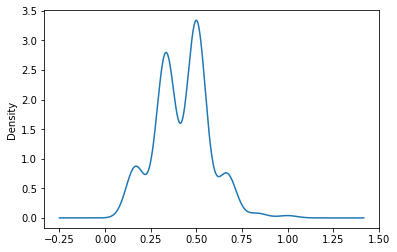

In [82]:
lambda_r_gradient = pd.Series(lambda_r_gradient)
lambda_r_gradient.plot.kde()